# Pymaceuticals Inc.
---

### Analysis

Capomulin had the highest number of subjects, while Propriva had the fewest.
Male mice outnumbered female mice by only 2% difference. This suggests that sex may not significantly influence the study's outcomes.
Final tumor volumes for mice treated with Capomulin and Ramicane  lower than those for the other regimens. Need to use equal number of mice to accurately observe a trend. 
Mouse ID l509 treated with Capomulin, indicates a decrease in tumor volume over time. Furthermore, sample charts of five mice treated under the same regimen reinforce the assumption that Capomulin could effectively reduce tumor volume.
Capomulin correlation coeffecient at 0.84, suggests a strong relationship between the two variables. Additionally, with an R-squared value of 0.71, it can be inferred that approximately 71% of the variability in final tumor volume can be predicted by using the average weight of the mouse

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [23]:
# Checking the number of mice.
num_mice = combined_df['Mouse ID'].nunique()
num_mice


249

In [24]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Find duplicate rows based on 'Mouse ID' and 'Timepoint'
duplicate_rows = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]


duplicate_mice = duplicate_rows['Mouse ID'].unique()

duplicate_mice


array(['g989'], dtype=object)

In [25]:
# Optional: Get all the data for the duplicate mouse ID. 
# Find duplicate rows based on 'Mouse ID' and 'Timepoint'

dup_mice_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
dup_mice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [27]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].nunique()

clean_mice

248

## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stat


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_ag =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_ag

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

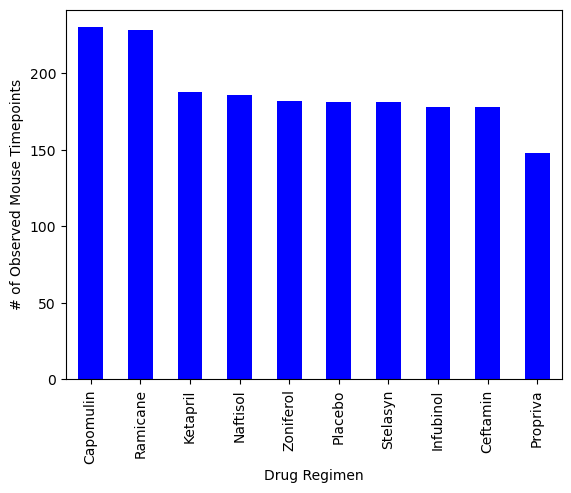

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_total = clean_df["Drug Regimen"].value_counts()
plot_pandas = mice_total.plot.bar(color='blue')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")


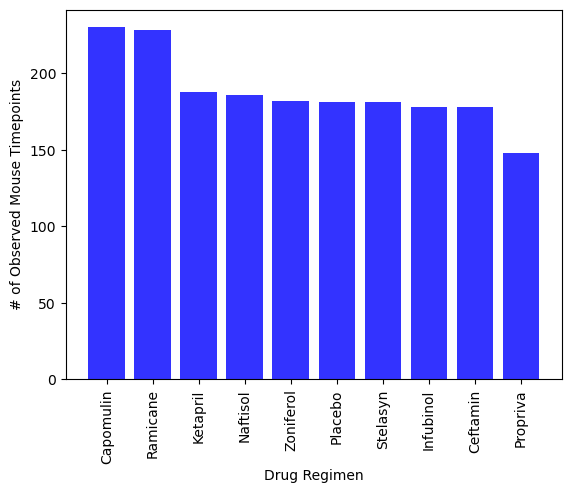

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_total.index.values
y_axis = mice_total.values

plt.bar(x_axis, y_axis, color='blue', alpha=0.8, align='center')



plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()

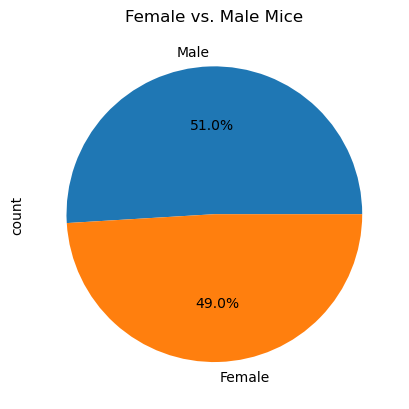

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

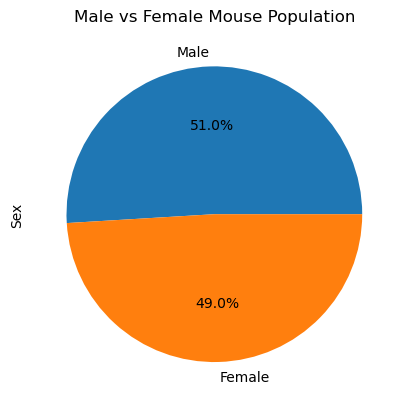

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()


final_tumor_volume = pd.merge(last_timepoint, clean_df, on=['Mouse ID', 'Timepoint'], how='left')


specified_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(specified_regimens)]




In [42]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
# Put treatments into a list
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


tumor_volume_data = []


for treatment in treatments:
   
    tumor_volume = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
   
    tumor_volume_data.append(tumor_volume)
    
   
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    
    
    print(f"Results for {treatment}:")
    print(f"IQR for {treatment}: {iqr}")
    print(f"Lower Quartile for {treatment}: {lower_quartile}")
    print(f"Upper Quartile for {treatment}: {upper_quartile}")
    print(f"Lower Bound for {treatment}: {lower_bound}")
    print(f"Upper Bound for {treatment}: {upper_bound}")
    print(f"Potential outliers for {treatment}: {outliers}\n")


Results for Capomulin:
IQR for Capomulin: 7.781863460000004
Lower Quartile for Capomulin: 32.37735684
Upper Quartile for Capomulin: 40.1592203
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)

Results for Ramicane:
IQR for Ramicane: 9.098536719999998
Lower Quartile for Ramicane: 31.56046955
Upper Quartile for Ramicane: 40.65900627
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)

Results for Infubinol:
IQR for Infubinol: 11.477135160000003
Lower Quartile for Infubinol: 54.04860769
Upper Quartile for Infubinol: 65.52574285
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Results for Ceftamin:
IQR for Ceftamin: 15.57775

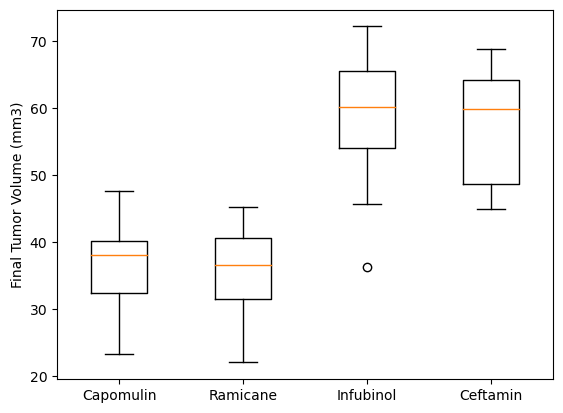

In [45]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



plt.boxplot(tumor_volume_data, labels=treatments)


plt.ylabel('Final Tumor Volume (mm3)')


plt.show()


## Line and Scatter Plots

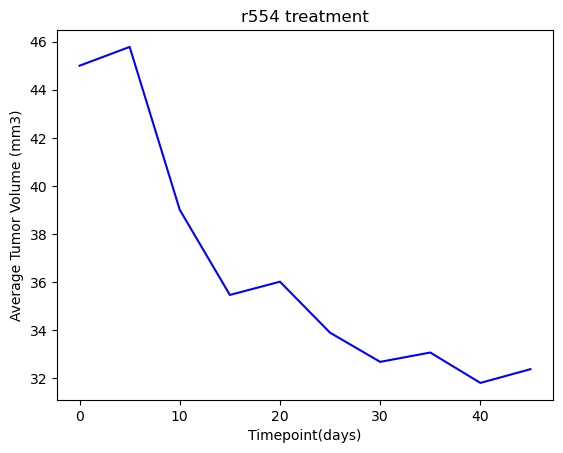

In [60]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Group by mouse ID to calculate the average tumor volume for each mouse
# Filter for Capomulin treatment
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']


single_mouse = capomulin_data[capomulin_data['Mouse ID'] == 'r554']


plt.plot(single_mouse['Timepoint'], single_mouse['Tumor Volume (mm3)'], linestyle='-', color='b')

plt.xlabel('Timepoint(days)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('r554 treatment')


plt.show()


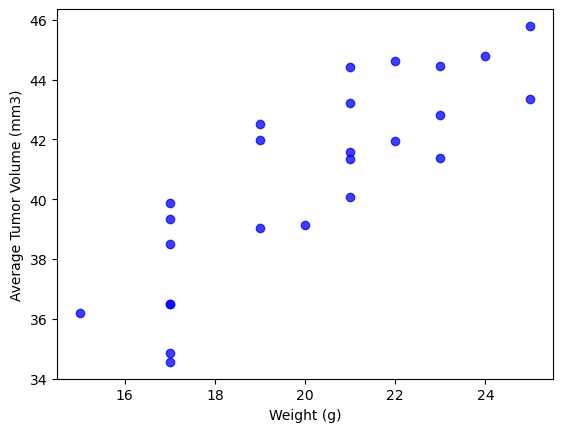

In [56]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen



average_tumor_volume = clean_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()


average_tumor_volume = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID', how='left')


capomulin_data = average_tumor_volume[average_tumor_volume['Drug Regimen'] == 'Capomulin']


plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'], marker='o', facecolors='blue', alpha=0.75)


plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')



plt.show()


## Correlation and Regression

In [68]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

import numpy as np
import scipy.stats as stats

# Filter for the Capomulin regimen
capomulin_data = average_tumor_volume[average_tumor_volume['Drug Regimen'] == 'Capomulin']

# Calculate correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])
print("Correlation Coefficient:", correlation_coefficient)








Correlation Coefficient: 0.8419363424694721


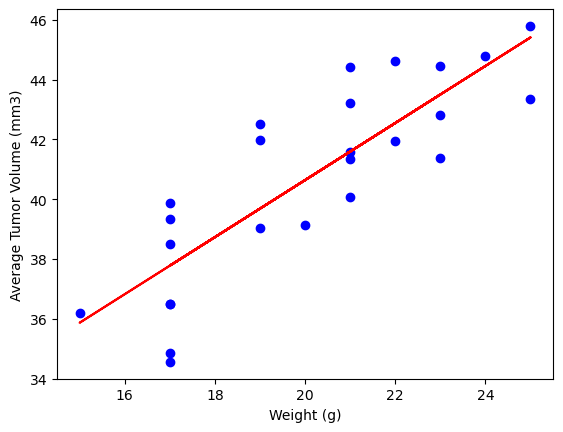

In [69]:

capomulin_data = average_tumor_volume[average_tumor_volume['Drug Regimen'] == 'Capomulin']


slope, intercept, r_value, p_value, std_err = stats.linregress(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])


plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'], color='blue', label='Data')


x_values = capomulin_data['Weight (g)']
plt.plot(x_values, slope * x_values + intercept, color='red', label='Line of Best Fit')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')





plt.show()
